In [1]:
import tensorflow as tf
import keras
#from tensorflow import keras
from keras import layers
import numpy as np
import os
from PIL import Image

In [2]:
# Load and preprocess data
import cv2

def load_data():
    data = []
    path = 'C:/Users/Medha Tiwari/Desktop/Sem 6/SGP/IR_Dataset_1'
    for filename in os.listdir(path):
        img = cv2.imread(os.path.join(path, filename))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (128, 128))
        data.append(img)
    data = np.array(data)
    data = np.expand_dims(data, -1)
    return data

def load_test_data():
    data = []
    path = 'C:/Users/Medha Tiwari/Desktop/Sem 6/SGP/IR_Dataset_1'
    for filename in os.listdir(path):
        img = cv2.imread(os.path.join(path, filename))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (128, 128))
        data.append(img)
    data = np.array(data)
    data = np.expand_dims(data, -1)
    return data

x_train = load_data()
x_test = load_test_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [3]:
print('x_train', x_train.shape)
print('x_test', x_test.shape)

x_train (272, 128, 128, 1)
x_test (272, 128, 128, 1)


In [4]:
# Define the encoder architecture
encoder_input = keras.Input(shape=(128, 128, 1))
x = layers.Conv2D(128, 3, activation="relu", padding="same")(encoder_input)
x = layers.MaxPooling2D(2, padding="same")(x)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
x = layers.MaxPooling2D(2, padding="same")(x)
x = layers.Conv2D(32, 3, activation="relu", padding="same")(x)
encoder_output = layers.MaxPooling2D(2, padding="same")(x)

In [5]:
# Define the decoder architecture
x = layers.Conv2D(32, 3, activation="relu", padding="same")(encoder_output)
x = layers.UpSampling2D(2)(x)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
x = layers.UpSampling2D(2)(x)
x = layers.Conv2D(128, 3, activation="relu", padding="same")(x)
x = layers.UpSampling2D(2)(x)
decoder_output = layers.Conv2D(1, 3, activation="sigmoid", padding="same")(x)

In [6]:
# Combine encoder and decoder into an autoencoder
autoencoder = keras.Model(encoder_input, decoder_output)

In [7]:
# Compile the autoencoder
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

In [15]:
#print model summary
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 128)     1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        18464 

In [8]:
# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=30, batch_size=33,shuffle=True, validation_split=0.1)

Epoch 1/30
8/8 [==============================] - 14s 1s/step - loss: 0.6868 - val_loss: 0.6404
Epoch 2/30
8/8 [==============================] - 9s 1s/step - loss: 0.6616 - val_loss: 0.4936
Epoch 3/30
8/8 [==============================] - 9s 1s/step - loss: 0.6276 - val_loss: 0.4941
Epoch 4/30
8/8 [==============================] - 9s 1s/step - loss: 0.6144 - val_loss: 0.4887
Epoch 5/30
8/8 [==============================] - 9s 1s/step - loss: 0.6055 - val_loss: 0.4859
Epoch 6/30
8/8 [==============================] - 9s 1s/step - loss: 0.6027 - val_loss: 0.4829
Epoch 7/30
8/8 [==============================] - 9s 1s/step - loss: 0.6010 - val_loss: 0.4810
Epoch 8/30
8/8 [==============================] - 9s 1s/step - loss: 0.5999 - val_loss: 0.4799
Epoch 9/30
8/8 [==============================] - 9s 1s/step - loss: 0.5990 - val_loss: 0.4796
Epoch 10/30
8/8 [==============================] - 9s 1s/step - loss: 0.5981 - val_loss: 0.4787
Epoch 11/30
8/8 [==============================]

In [9]:
# save model
#autoencoder.save("autoencoder.h5")

In [10]:
# Generate reconstructed images from the test data
reconstructed_images = autoencoder.predict(x_test)

9/9 [==============================] - 9s 300ms/step


In [11]:
# Evaluate the performance of the autoencoder
autoencoder.evaluate(x_test, x_test)

9/9 [==============================] - 3s 294ms/step - loss: 0.5827


0.5826989412307739

In [12]:
# Use the autoencoder for compression or denoising
encoded_imgs = autoencoder.predict(x_test)

9/9 [==============================] - 3s 304ms/step


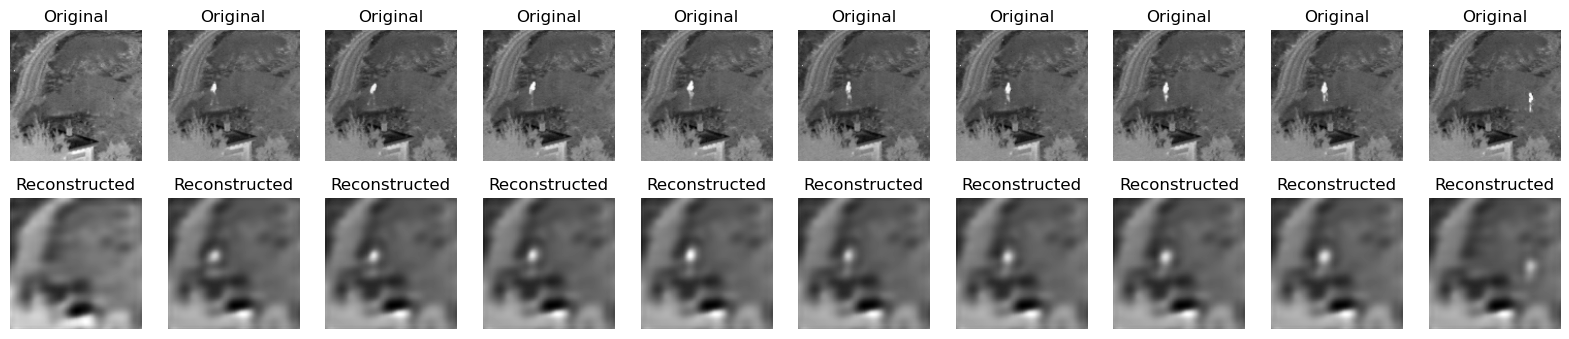

In [13]:

import matplotlib.pyplot as plt
n = 10  # number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(128, 128), cmap='gray')
    plt.title('Original')
    plt.axis('off')
    
    # display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_images[i].reshape(128, 128), cmap='gray')
    plt.title('Reconstructed')
    plt.axis('off')
plt.show()